<a href="https://colab.research.google.com/github/FJWangYantao/FJWangYantao.github.io/blob/main/multiclass_classcification_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
train_labels[0]

3

In [ ]:
word_index=reuters.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire=" ".join([reverse_word_index.get(i-3,"?") for i in train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [ ]:
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
  results = np.zeros((len(sequences),dimension))#创建一个形状为(len(sequences),dimension)的零矩阵
  for i,sequence in enumerate(sequences):
    for j in sequence:
      results[i,j]=1.#将results[i]的某些值初始化为1
  return results
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [ ]:
def to_one_hot(labels,dimension=46):
  results=np.zeros((len(labels),dimension))
  for i,label in enumerate(labels):
    results[i,label] = 1.
  return results

y_train=to_one_hot(train_labels)
y_test=to_one_hot(test_labels)

#也可以使用Keras的内置方法
#from tensorflow.keras.utils import to_categorical
#y_train = to_categorical(train_labels)
#y_test = to_categorical(train_labels)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(64,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(46,activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
      loss="categorical_crossentropy",
      metrics=["accuracy"])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [ ]:
history=model.fit(
    partial_x_train,
    partial_y_train,
    epochs=9,
    batch_size=512,
    validation_data=(x_val,y_val)
)

Epoch 1/9
16/16 [==============================] - 1s 56ms/step - loss: 0.1297 - accuracy: 0.9558 - val_loss: 0.9507 - val_accuracy: 0.8130
Epoch 2/9
16/16 [==============================] - 1s 49ms/step - loss: 0.1224 - accuracy: 0.9579 - val_loss: 0.9546 - val_accuracy: 0.8060
Epoch 3/9
16/16 [==============================] - 1s 59ms/step - loss: 0.1156 - accuracy: 0.9598 - val_loss: 0.9597 - val_accuracy: 0.8130
Epoch 4/9
16/16 [==============================] - 1s 84ms/step - loss: 0.1168 - accuracy: 0.9578 - val_loss: 0.9396 - val_accuracy: 0.8200
Epoch 5/9
16/16 [==============================] - 1s 84ms/step - loss: 0.1127 - accuracy: 0.9580 - val_loss: 0.9910 - val_accuracy: 0.8170
Epoch 6/9
16/16 [==============================] - 1s 46ms/step - loss: 0.1135 - accuracy: 0.9574 - val_loss: 0.9787 - val_accuracy: 0.8250
Epoch 7/9
16/16 [==============================] - 1s 47ms/step - loss: 0.1096 - accuracy: 0.9575 - val_loss: 1.0015 - val_accuracy: 0.8150
Epoch 8/9
16/16 [===

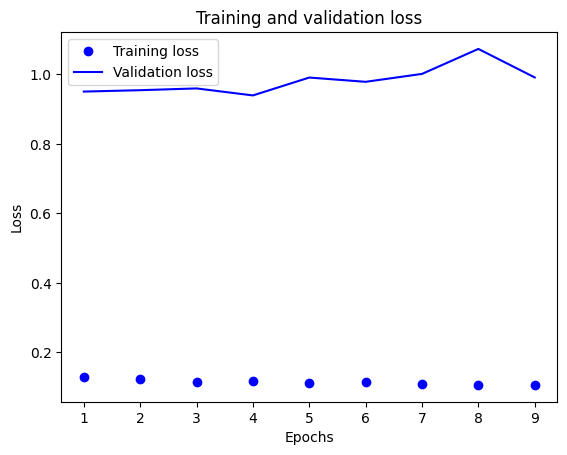

In [ ]:
import matplotlib.pyplot as plt
loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,"bo",label="Training loss")
plt.plot(epochs,val_loss,"b",label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

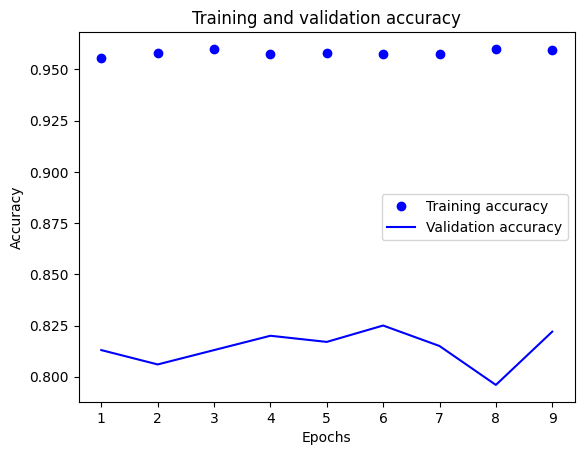

In [ ]:
import matplotlib.pyplot as plt
loss=history.history["accuracy"]
val_loss=history.history["val_accuracy"]
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,"bo",label="Training accuracy")
plt.plot(epochs,val_loss,"b",label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()